# Recurrent Neural Networks

- RNNs are special kind of neural networks that are designed to handle sequential data.
- Unlike traditional NN that processes individual inputs (fixed number), RNNs can analyze information that changes over time, such as text, speech, or time-series data.
- This is achieved by incorporating a loop within the network architecture, allowing the network to consider past information when processing the current input.

![RNNs](https://miro.medium.com/v2/resize:fit:751/1*dznTsiaHCvRc70fxWWEcgw.png)

Types of RNNs:
- One-to-One e.g. Traditional Neural Network (1-phase RNN)
- One-to-Many e.g. Music generation 
- Many-to-One e.g. Text classification or sentiment analysis
- Many-to-Many e.g. Language translation
- Many-to-Many e.g. Name entity recognition 

![RNNType](https://i.sstatic.net/6VAOt.jpg)

![rnns](https://db0dce98.rocketcdn.me/es/files/2021/07/Sans-titre-1-Recupere-07-1024x429.png)

## Text Classification
We have multiple RNN models to choose from:
- **Vanilla RNN** The simplest architecture. The disadvantage is it suffers from the vanishing gradient problem, where the information from distant past sequences can become insignificant (memory loss). In other words, it doesn't work well with long text.
- **Long Short-Term Memory (LSTM)** It addresses the vanishing gradient problem by introducing gates that control the flow of information within the network. Therefore, they're effective for long-term dependencies.
- **Gated Recurrent Unit (GRU)** Similar to LSTM, they overcome the vanishing gradient problem, but they use a different mechanism - simpler gating mechanism compared to LSTMs. So, it's computationally more efficient.


> Before we jump into deploying RNNs, we need to understand how to preprocess language/text data using NLP (Natural Language Processing)

## Natural Language Processing

- For text or audio data that deals with human language, we need to pre-process the data using NLP (Natural Language Processing) techniques.
- We'll be using `nltk` (Natural Language Toolkit), which is a popular open-source python library for working with human language data.
- Capabilities:
    - Text Preprocessing: NLTK offers modules for tokenization (splitting the text into words or sentences), stop word removal, etc... these steps are necessary to have clean data
    - Corpus Handling: NLTK gives access to a variety of corpora (collection fo text data), such as Brown Corpus, Reuters Corpus, etc... 
    - Feature Extraction: it has tools for extracting linguistic features from text, such as part-of-speech tags, named entities, and more. 
    - Evaluation Metrics: it offers various evaluation metrics.
- Concepts in NLP and Text Preprocessing:
    - Text Cleaning:
        - **Tokenization** refers to breaking down text into smaller units called **tokens**, such as words, phrases, or sentences.
            - **Word Tokenization** split the text into individual words. For example, "I study Machine Learning" -> `['I', 'study', 'Machine', 'Learning']`
            - **Sentence Tokenization** split the text into individual sentences. For example, "I study Machine Learning. Currently, we are covering NLP." -> `["I study Machine Learning.", "Currently, we are covering NLP."]`

        - **Special Characters Removal** Depending on the application, remove punctuation and other special characters if they're not needed.
            - `re.sub(r'[^a-zA-Z0-9\s]', '', text)`
        - **Whitespace Removal**
            - `text.strip()`
        - **Stop Words Removal**: 
            - Stop words (e.g. the, and, is, etc...) don't contribute much to the meaning of a sentence. Removing them, helps clean data and achieve better performance.
            - `nltk` provides a list of English stop words (other languages are available)
            - `nltk.corpus.stopwords`
        

            - WordNet Lemmatizer: Dictionary-based lemmatization `nltk.stem.WordNetLemmatizer()`
    - Text Normalization:
        - Remove short words e.g. `len(word)<3`
        - Remove long words e,g, `len(word)>15`
        - Remove infrequent words
        - **Lower Case Conversion**:
            - To avoid redundancy in token lists, we convert all the words to lowercase. It ensures the model doesn't treat same words different case differently.
            - `text.lower()`
        - **Stemming and Lemmatization** Reducing the word to its base form. e.g. changing, changed, changes -> change
            - Porter Stemmer: reduce the words to base form `nltk.stem.PorterStemmer()`
            - Snowball Stemmer: Another alternative `nltk.stem.SnowballStemmer()`
- Lexicon:
    - A lexicon is a collection of words and their special meaning that are unique to the language. It can also be part of speech (noun, verb, etc...)
    - `nltk` provides access to various lexicons
    - Examples:
        - "Tsunami"
        - "Run can be a verb or noun
        - "Dog" refers to a domesticated mammal
        - shortened words
        - idioms 



`pip install nltk`

**Exercise:** </br>
Build an RNN model that predicts the class/genre of articles from BBC website.

1. Import the required libraries and configs
2. Load the data and preprocessing it
3. Define our hyperparameters
4. Initialize a tokenizer and fit it to the train data
5. Convert the train date articles into sequences using our defined tokenizer
6. Pad the sequences
7. Repeat the same process for label data
8. Split the data into train and test
9. Build, compile, and train the model
10. Model evaluation

#### Step 1

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bassel_instructor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#for compatibility, we use pad seq to transform a list into a 2D array of shape (num_samples, num_timesteps)
from tensorflow.keras.preprocessing.sequence import pad_sequences
# for the model components
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, SimpleRNN, Dropout, LSTM

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split



#### Step 2 - Read The Data from A File, Split It Into Articles and Labels Lists, Remove StopWords

> We'll use csv file read functionality to import and clean the data using STOPWORDS

In [3]:
articles, labels = list(), list()

data_path = '/Users/bassel_instructor/Documents/Datasets/'
data_file = 'bbc-text.csv'

with open(data_path+data_file, 'r') as bbc_file: #open in read mode
    reader = csv.reader(bbc_file)
    next(reader) # skip the first row of the csv file because we have columns headers

    #a loop to iterate for each row
    for row in reader:
        # append to lables list
        labels.append(row[0])

        #for articles, we can apply text cleansing here
        article = row[1]
        # for each article, loop through the pre-defined STOPWORDS and remove them
        # we wrap each stop word with spaces to avoid having extra spaces
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            
        #once the cleansing is done, append to the articles list
        articles.append(article)

We can check the num of articles and lables

In [4]:
len(articles) == len(labels)

True

In [5]:
labels[:9] # top 9 results

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport']

In [6]:
# get unique values for labels 
print(f'We have {len(set(labels))} classes: {set(labels)}')

We have 5 classes: {'entertainment', 'tech', 'politics', 'business', 'sport'}


In [7]:
articles[:9]

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companie

#### Step 3

#### Step 4: Define The Hyperparameters

- For `Tokenizer`:
    - **Vocabulary Size:** for efficiency, it's recommended to set a max size of vocabulary. For example, if we set it to 5000, that means only the top 4,999 words (by occurrence frequency) are included. It can help reduce the complexity of the model and address overfitting..
    - **Out-of_Vocabulary Token** All other words (outside of top 4,999 words) are ignored and treated as OOV. they are replaced by a placeholder/arbitrary token. e.g. `<OOV>`
- For `pad_sequences`: It's an NLP function that preprocess variable-length sequences for model efficiency. It also helps with having a uniform input and preserving meaning.
    - `max_len` maximum length of a sequence. If a sequence is longer than `maxlen` it will be truncated - either at the start or end, based on `truncating` argument.
    - `truncating` the truncation method whether at the beginning or end of a sequence (length is based on `max_len`)
    - `padding` specifies whether padding should be added to the beginning or end of a sequence ('pre' vs 'post')

> Increase the values of the hyperparameters based on the type and complexity of the task, as well as the performance consideration.


Padding Example: 
- 'Hello'
- 'Hello World'
- 'Hello World this is the 3d example'
 
with 'post', it becomes:
- `'Hello <pad> <pad> <pad> <pad> <pad> <pad>'`
- `'Hello World <pad> <pad> <pad> <pad> <pad>'`
- `'Hello World this is the third example'`

In [8]:
# for tokenizer
vocab_size = 5000
oov_tok = '<OOV>'

# for pad sequences
max_length = 200
trunc_type = 'post'
padding_type = 'post'

# for the model
embedding_dim = 64 #higher number may cause overfitting
num_epochs = 5


#### Step 5

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

We'll fit the tokenizer on our data, which will:
1. Build the word index by analyzing the `train_articles` data
2. Create a mapping of words to integers based on the word frequency in the data

In [10]:
tokenizer.fit_on_texts(articles)

1. Retrieve the word index created by the `fit_on_texts` method
2. If we print the word index, we should see the assigned mapping

In [11]:
model_word_index = tokenizer.word_index

In [12]:
# view a sample
model_word_index

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'world': 16,
 'government': 17,
 'uk': 18,
 'years': 19,
 'best': 20,
 'make': 21,
 'told': 22,
 'get': 23,
 'film': 24,
 'like': 25,
 'game': 26,
 'made': 27,
 'back': 28,
 'music': 29,
 'many': 30,
 'three': 31,
 '000': 32,
 'labour': 33,
 'next': 34,
 '1': 35,
 'bbc': 36,
 'well': 37,
 'set': 38,
 'number': 39,
 'take': 40,
 'way': 41,
 'added': 42,
 'market': 43,
 '2': 44,
 'may': 45,
 'says': 46,
 'company': 47,
 'home': 48,
 'election': 49,
 'good': 50,
 '2004': 51,
 'going': 52,
 'party': 53,
 'still': 54,
 'games': 55,
 'much': 56,
 'england': 57,
 'win': 58,
 '6': 59,
 'go': 60,
 'work': 61,
 'since': 62,
 'firm': 63,
 'second': 64,
 'show': 65,
 'top': 66,
 'blair': 67,
 'think': 68,
 'week': 69,
 'use': 70,
 'say': 71,
 'million': 72,
 'part': 73,
 'play': 74,
 'technology': 75,
 'minister': 

#### Step 6 - Convert the Train Articles into Sequences Using The Tokenizer

- Using `texts_to_sequences`, we'll convert the train data text into a list of integer sequences using the word index we just created 
- Each word in the text is replaced by its corresponding integer in the article (i.e. encoding)

In [13]:
X = tokenizer.texts_to_sequences(articles)

X[10] # the 11th article

[2629,
 1,
 241,
 4789,
 24,
 684,
 574,
 241,
 4789,
 1,
 1,
 1783,
 1,
 1,
 2629,
 24,
 677,
 1,
 1,
 162,
 276,
 1,
 162,
 276,
 827,
 942,
 546,
 2251,
 1,
 1225,
 1847,
 1,
 1872,
 1,
 1,
 4991,
 1,
 1,
 1,
 1,
 1,
 1,
 122,
 4790,
 1,
 2,
 2572,
 1466,
 356,
 1,
 1,
 52,
 306,
 1,
 356,
 2031,
 4120,
 42,
 24,
 3844,
 1,
 1,
 1,
 1,
 545,
 1,
 1,
 1,
 962,
 671,
 2510,
 309,
 4791,
 1,
 361,
 24,
 1,
 745,
 2291,
 1,
 4792,
 140,
 10,
 1,
 3845,
 660,
 3396,
 1,
 24,
 1,
 444,
 942,
 546,
 1,
 97,
 13,
 668,
 4991,
 241,
 4789,
 1,
 592,
 1,
 1847,
 1028,
 1,
 4260,
 728,
 2032,
 111,
 1,
 1,
 1,
 2801,
 24,
 1,
 102,
 276,
 1,
 1811,
 4594,
 545,
 498,
 1,
 1659,
 3620,
 784,
 1267,
 1,
 1870,
 10,
 31,
 684,
 317,
 1,
 66,
 568,
 677,
 315,
 1613,
 24,
 499,
 1,
 1,
 1716,
 1,
 811,
 1,
 3213,
 1,
 1268,
 6,
 1,
 2629,
 677,
 24,
 2866,
 1,
 1,
 1,
 1,
 1,
 1,
 863,
 38,
 1932,
 609,
 282,
 29,
 1108,
 1,
 903,
 24,
 372,
 24,
 13,
 315,
 1613,
 1306,
 409,
 19,
 64,
 963,
 108

#### Step 7 - Sequences Padding

- We'll pad the sequences based on our pre-defined hyperparameters
- It's a crucial step in text data prep, especially for training text classification models when dealing with variable-length input, such as the BBC Articles project we're working on. 

In [14]:
X = pad_sequences(X
                    , maxlen=max_length
                    , padding=padding_type
                    , truncating=trunc_type)

In [15]:
X[10]

array([2629,    1,  241, 4789,   24,  684,  574,  241, 4789,    1,    1,
       1783,    1,    1, 2629,   24,  677,    1,    1,  162,  276,    1,
        162,  276,  827,  942,  546, 2251,    1, 1225, 1847,    1, 1872,
          1,    1, 4991,    1,    1,    1,    1,    1,    1,  122, 4790,
          1,    2, 2572, 1466,  356,    1,    1,   52,  306,    1,  356,
       2031, 4120,   42,   24, 3844,    1,    1,    1,    1,  545,    1,
          1,    1,  962,  671, 2510,  309, 4791,    1,  361,   24,    1,
        745, 2291,    1, 4792,  140,   10,    1, 3845,  660, 3396,    1,
         24,    1,  444,  942,  546,    1,   97,   13,  668, 4991,  241,
       4789,    1,  592,    1, 1847, 1028,    1, 4260,  728, 2032,  111,
          1,    1,    1, 2801,   24,    1,  102,  276,    1, 1811, 4594,
        545,  498,    1, 1659, 3620,  784, 1267,    1, 1870,   10,   31,
        684,  317,    1,   66,  568,  677,  315, 1613,   24,  499,    1,
          1, 1716,    1,  811,    1, 3213,    1, 12

We can see the padding above from the 11th article (multiple zeroes).

In [16]:
np.max(X)

4999

Repeat the same steps for Lables

In [17]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

y = np.array(label_tokenizer.texts_to_sequences(labels))

In [18]:
y

array([[4],
       [2],
       [1],
       ...,
       [5],
       [3],
       [1]])

In [19]:
np.unique(y)

array([1, 2, 3, 4, 5])

### Split The Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 8a Build The Model

##### Using Vanilla RNN

In [22]:

simple_rnn_model = tf.keras.Sequential([
          Embedding(vocab_size, embedding_dim),
          Bidirectional(SimpleRNN(embedding_dim)),
          Dense(embedding_dim, activation='relu'),
          #output layer
          Dense(6, activation='softmax') #exception for num of categories add one of 'unknown'
])

In [23]:
simple_rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Step 8b - Compile

In [24]:
simple_rnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

Step 8c - Model Training

In [25]:
model_hist = simple_rnn_model.fit(X_train,
                           y_train,
                           epochs=num_epochs,
                           validation_data=(X_test, y_test))

Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2575 - loss: 1.6795 - val_accuracy: 0.3146 - val_loss: 1.5680
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4456 - loss: 1.4318 - val_accuracy: 0.5798 - val_loss: 1.1051
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8396 - loss: 0.7548 - val_accuracy: 0.7146 - val_loss: 0.7834
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9774 - loss: 0.2200 - val_accuracy: 0.7708 - val_loss: 0.5647
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9939 - loss: 0.0425 - val_accuracy: 0.7708 - val_loss: 0.5811


In [26]:
plt.style.use('bmh')

In [27]:
def plot_training_history(history):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Get the number of epochs
    epochs = len(history.history['accuracy'])
    
    # Create x-axis values
    x_values = np.arange(1, epochs + 1)
    
    # Plot accuracy vs. val_accuracy
    ax1.plot(x_values, history.history['accuracy'], label='Training Accuracy')
    ax1.plot(x_values, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.set_xticks(x_values)  # Set x-ticks to be integer epochs
    
    # Plot loss vs. val_loss
    ax2.plot(x_values, history.history['loss'], label='Training Loss')
    ax2.plot(x_values, history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.set_xticks(x_values)  # Set x-ticks to be integer epochs
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

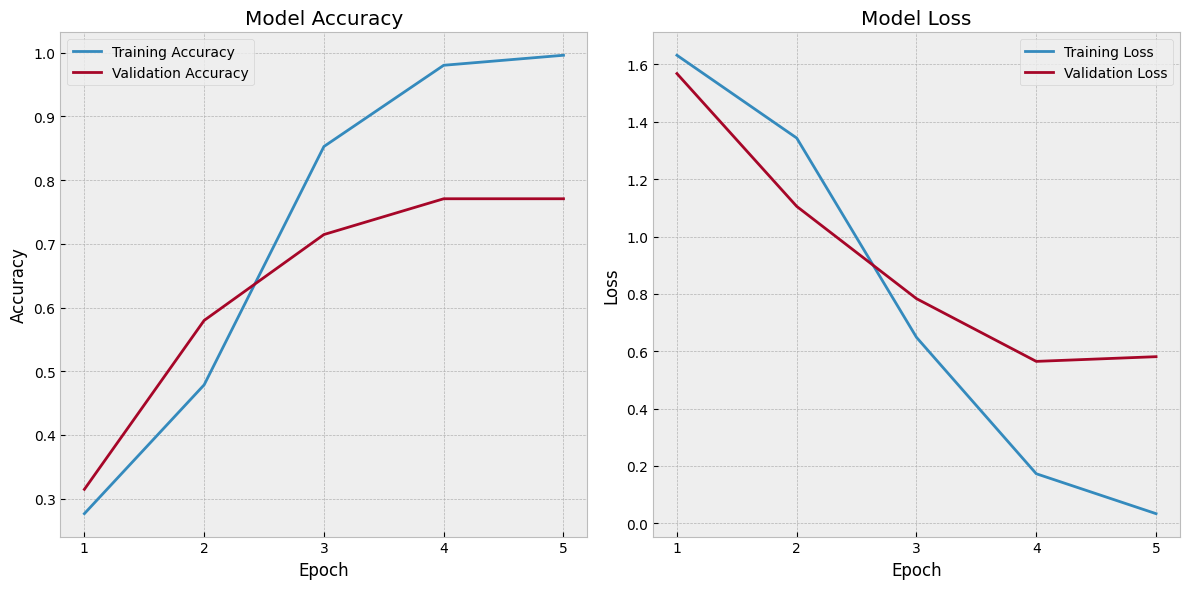

In [28]:
plot_training_history(model_hist)

Suggestion for improvement:
- Adding regularization
- More epochs after regularization
- Using LSTM instead of vanilla RNN

In [29]:

rnn_model_v2 = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(SimpleRNN(embedding_dim)),
    Dense(embedding_dim, activation='relu'),
    Dropout(0.5),
    #output layer
    Dense(6, activation='softmax')
])

rnn_model_v2.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

num_epochs = 10
rnn_model_v2_hist = rnn_model_v2.fit(X_train,
                           y_train,
                           epochs=num_epochs,
                           validation_data=(X_test, y_test))

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2123 - loss: 1.7390 - val_accuracy: 0.3236 - val_loss: 1.5785
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3139 - loss: 1.5585 - val_accuracy: 0.3551 - val_loss: 1.5143
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4967 - loss: 1.3307 - val_accuracy: 0.5640 - val_loss: 1.2493
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7910 - loss: 0.7405 - val_accuracy: 0.5506 - val_loss: 1.0326
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9568 - loss: 0.2494 - val_accuracy: 0.7326 - val_loss: 0.6632
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9965 - loss: 0.0602 - val_accuracy: 0.7573 - val_loss: 0.6172
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9969 - loss: 0.0301 - val_accuracy: 0.6989 - val_loss: 0.8278
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9990 - loss: 0.0201 - val_accuracy: 0.7551 - v

##### Using LSTM

In [30]:

rnn_model_lstm = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(embedding_dim)), #only adjustment
    Dense(embedding_dim, activation='relu'),
    Dropout(0.5),
    #output layer
    Dense(6, activation='softmax')
])

rnn_model_lstm.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

num_epochs = 10
rnn_model_lstm_hist = rnn_model_lstm.fit(X_train,
                           y_train,
                           epochs=num_epochs,
                           validation_data=(X_test, y_test))

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.2360 - loss: 1.7112 - val_accuracy: 0.5326 - val_loss: 1.3737
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.4873 - loss: 1.2417 - val_accuracy: 0.7820 - val_loss: 0.6270
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8021 - loss: 0.5931 - val_accuracy: 0.9191 - val_loss: 0.3622
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9211 - loss: 0.3085 - val_accuracy: 0.8112 - val_loss: 0.5332
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8847 - loss: 0.3152 - val_accuracy: 0.9326 - val_loss: 0.2792
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9856 - loss: 0.0770 - val_accuracy: 0.9416 - val_loss: 0.2110
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9931 - loss: 0.0458 - val_accuracy: 0.9371 - val_loss: 0.2441
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9958 - loss: 0.0274 - val_accuracy: 0.9236 - 

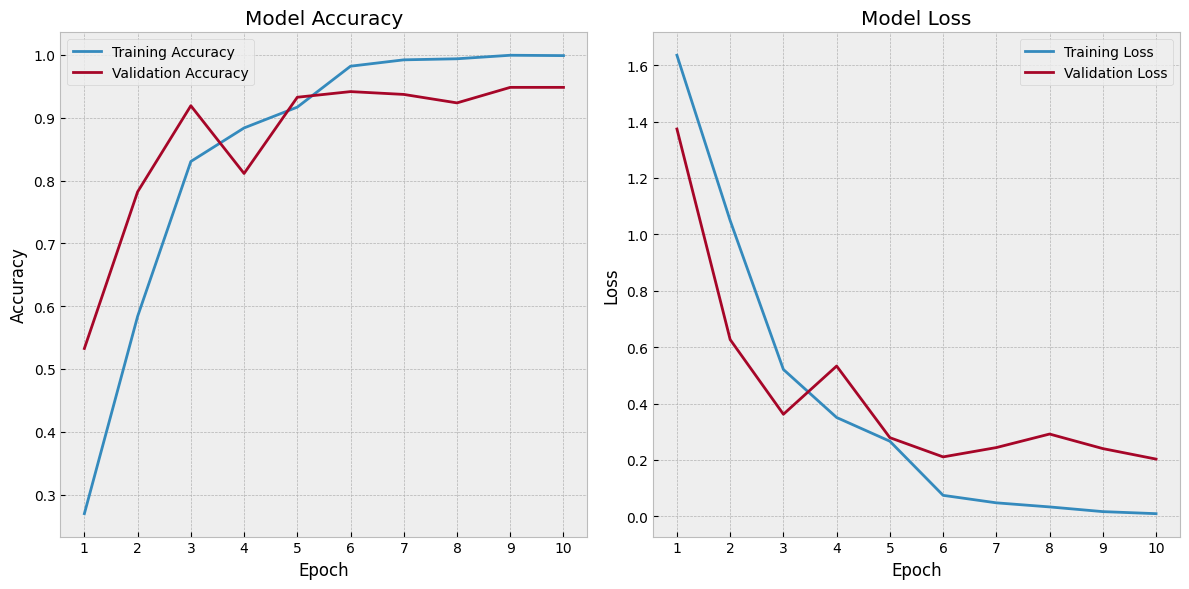

In [31]:
plot_training_history(rnn_model_lstm_hist)

## Additional Evaluation - Confusion Matrix

In [32]:
# Making predictions
y_pred_rnn = simple_rnn_model.predict(X_test)
y_pred_lstm = rnn_model_lstm.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [33]:
y_pred_lstm.shape, y_pred_rnn.shape, y_test.shape

((445, 6), (445, 6), (445, 1))

In [34]:
# Convert the probabilities to class labels
y_pred_rnn_labels = np.argmax(y_pred_rnn, axis=1)
y_pred_lstm_labels = np.argmax(y_pred_lstm, axis=1)


In [39]:
label_tokenizer.word_index.keys()

dict_keys(['sport', 'business', 'politics', 'tech', 'entertainment'])

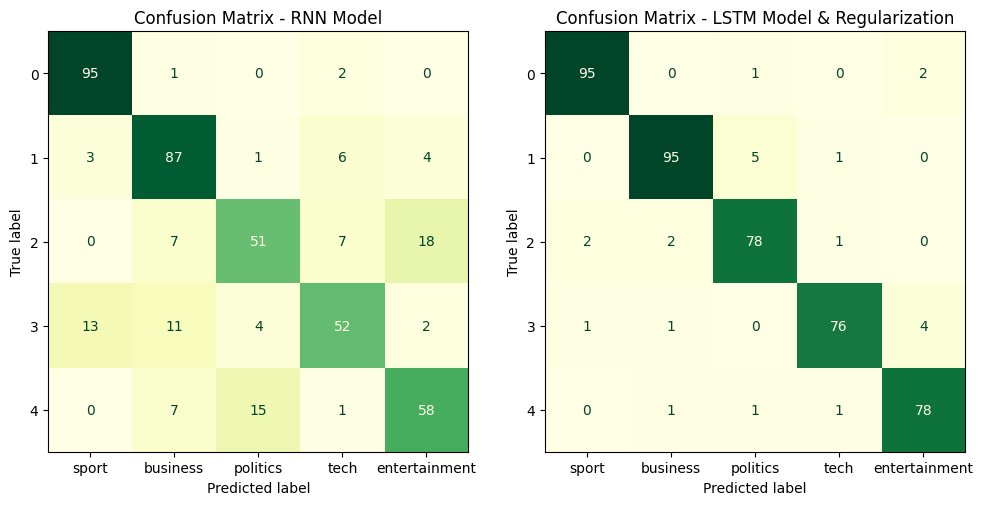

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.style.use('default')

# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Confusion Matrix for RNN model
cm_rnn = confusion_matrix(y_test, y_pred_rnn_labels)
disp_rnn = ConfusionMatrixDisplay(confusion_matrix=cm_rnn)
disp_rnn.plot(ax=ax[0], colorbar=False, cmap='YlGn')  
ax[0].set_title("Confusion Matrix - RNN Model")
ax[0].set_xticklabels(label_tokenizer.word_index.keys())

# Confusion Matrix for LSTM model
cm_lstm = confusion_matrix(y_test, y_pred_lstm_labels)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm)
disp_lstm.plot(ax=ax[1], colorbar=False, cmap='YlGn')  
ax[1].set_title("Confusion Matrix - LSTM Model & Regularization")
ax[1].set_xticklabels(label_tokenizer.word_index.keys())

# Adjust layout and show the plots side by side
plt.tight_layout(w_pad=1.7)
plt.show()